##Аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
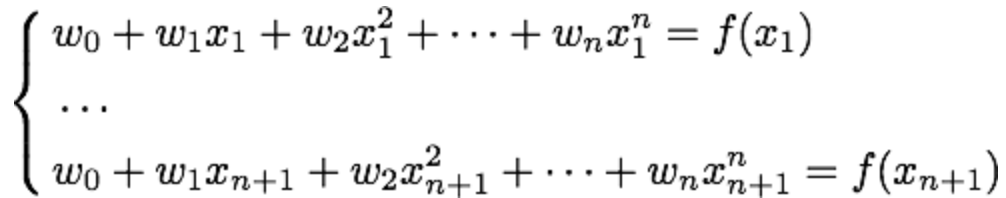

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
f(x = 1) = 3.252216865271419
f(x = 15) = 0.6352214195786656
[ 3.43914511 -0.18692825]


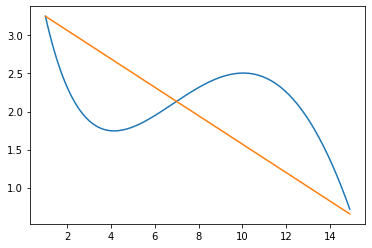

In [87]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import math
from google.colab import drive
drive.mount('/content/drive')

f = lambda x: np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
x = np.arange(1, 15, 0.1)
plt.plot(x, f(x))
f1 = math.sin(1/5) * math.exp(1/10) + 5 * math.exp(-(1 / 2))
f15 = math.sin(15/5) * math.exp(15/10) + 5 * math.exp(-(15 / 2))
print('f(x = 1) =', f1)
print('f(x = 15) =', f15)
#w0 + w1*1**1 = 3.252216865271419
#w0 + w1*15**1 = 0.6352214195786656                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
m = np.array([[1, 1], [1, 15]])
v = np.array([f1, f15])
res = scipy.linalg.solve(m, v)
print(res)

y = res[0] + res[1]*x 
plt.plot(x, y)



2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?


[ 3.32512949 -0.06531159 -0.00760104]


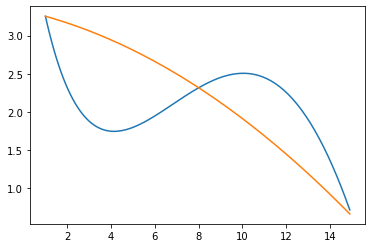

In [13]:
f = lambda x: np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
x = np.arange(1, 15, 0.1)
plt.plot(x, f(x))
#w0 + w1*1 ** 1 + w2 * 1**2 = 3.252216865271419
#w0 + w1*8 + w2 * 8**2 = 
#w0 + w1*15 + w2 * (15 |** 2)
m = np.array([[1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]])
f8 = f(8)
v = np.array([f1, f8, f15])
res2 = scipy.linalg.solve(m, v)
print(res2)
g = res2[0] + res2[1] * x + res2[2] * x ** 2
plt.plot(x, g)

3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


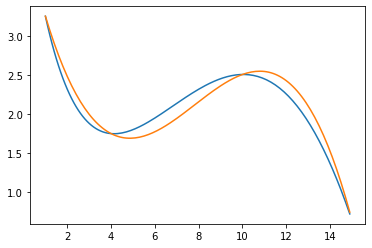

In [78]:
f3 = lambda x: np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
x = np.arange(1, 15, 0.1)
plt.plot(x, f(x))
f_1 = f3(1)
f_4 = f3(4)
f_10 = f3(10)
f_15 = f(15)
# w0 + 1 * w1 + w2 * 1**2 + w3 * 1**3
# w0 + 4 * w1 + w2 * 4**2 + w3 * 4**3
# w0 + 10 * w1 + w2 * 10**2 + w3 * 10**3
# w0 + w1 * 15 + w3 * 15**2 + w3 * 15**3
matr_1_4_10_15 = [[1., 1, 1, 1], [1., 4, 4**2, 4**3],
               [1., 10, 10**2, 10**3], [15**n for n in range(0, 4)]]
v_1_4_10_15 = [f_1, f_4, f_10, f_15]
res3 = scipy.linalg.solve(matr_1_4_10_15, v_1_4_10_15)
h = res3[0] + res3[1] * x + res3[2] * x**2 + res3[3] * x**3
print(res3)
plt.plot(x, h)

4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [138]:
handle = open('/content/drive/My Drive/Colab_Notebooks/submission-2.txt', 'w')
result = str()
for i in range(0,4):
  res3[i] = 0 if (round(res3[i], 1) == 0) else res3[i]
  result += str((round(res3[i], 1)))
  if (i < 3):
    result += ' '
print(result)
handle.write(result)
handle.close()

4.4 -1.3 0.2 0.0
